In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv("Parks.csv", index_col="id")

Text(0.5, 1.0, 'Playgrounds in Neighborhoods in Pittsburgh')

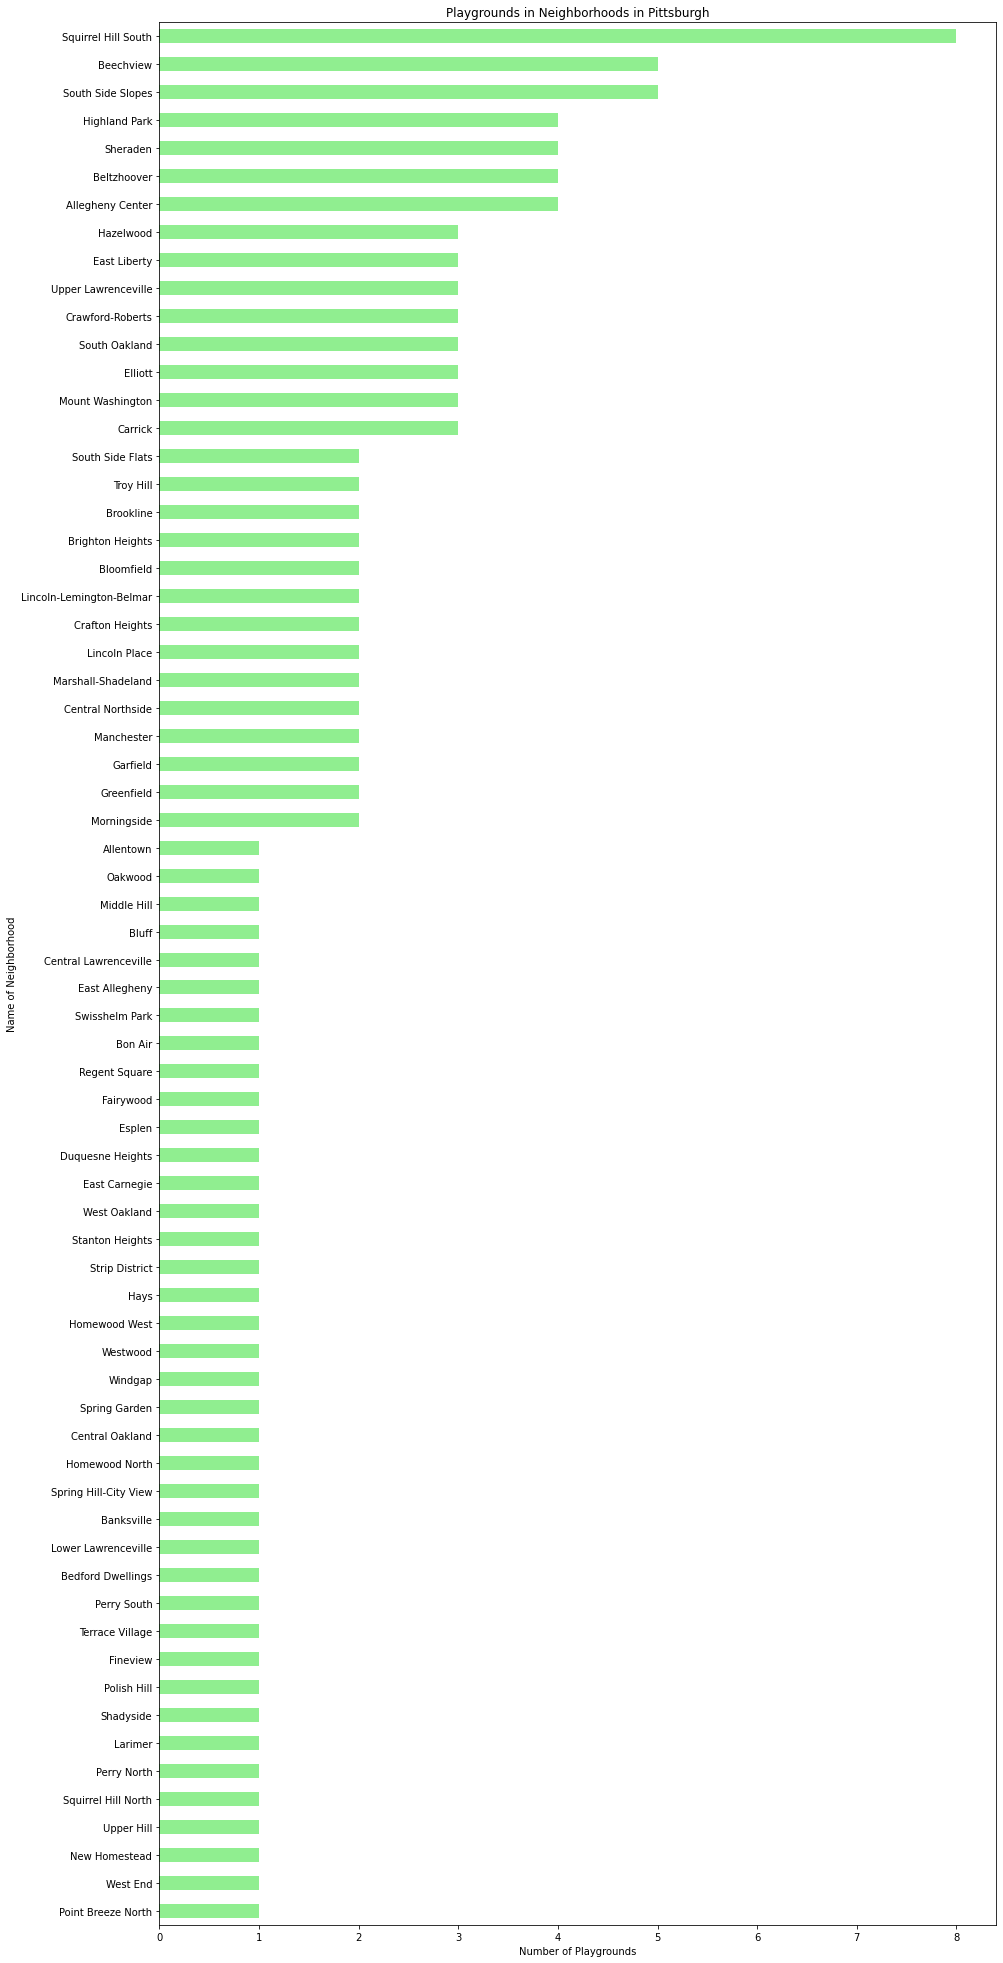

In [6]:
# Renames and reads Playgrounds.csv
playgrounds = pd.read_csv("Playgrounds.csv", index_col="id")
# Plots a graph where the value_counts() gets how many parks in the neighborhood and renames the graph as ax for axis labeling
Playgrounds = playgrounds['neighborhood'].value_counts().sort_values()
ax = Playgrounds.plot(kind='barh', rot=0, figsize=(15,35), color = 'lightgreen')
ax.set_xlabel("Number of Playgrounds")
ax.set_ylabel("Name of Neighborhood")
plt.title("Playgrounds in Neighborhoods in Pittsburgh")

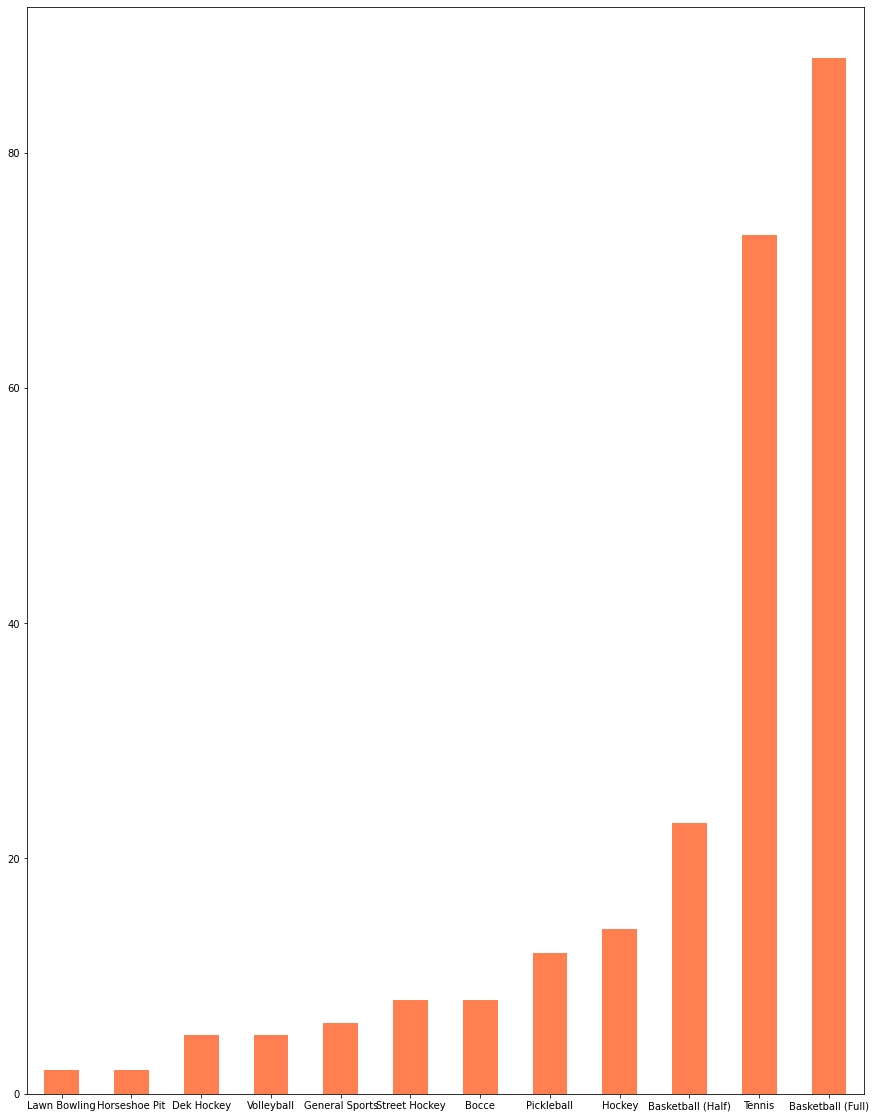

In [7]:
y = df['type'].value_counts().sort_values()
y.plot(kind='bar', rot=0, figsize=(15,20), color = 'coral')

In [9]:
Parks = df['neighborhood'].value_counts().sort_values(ascending = False)

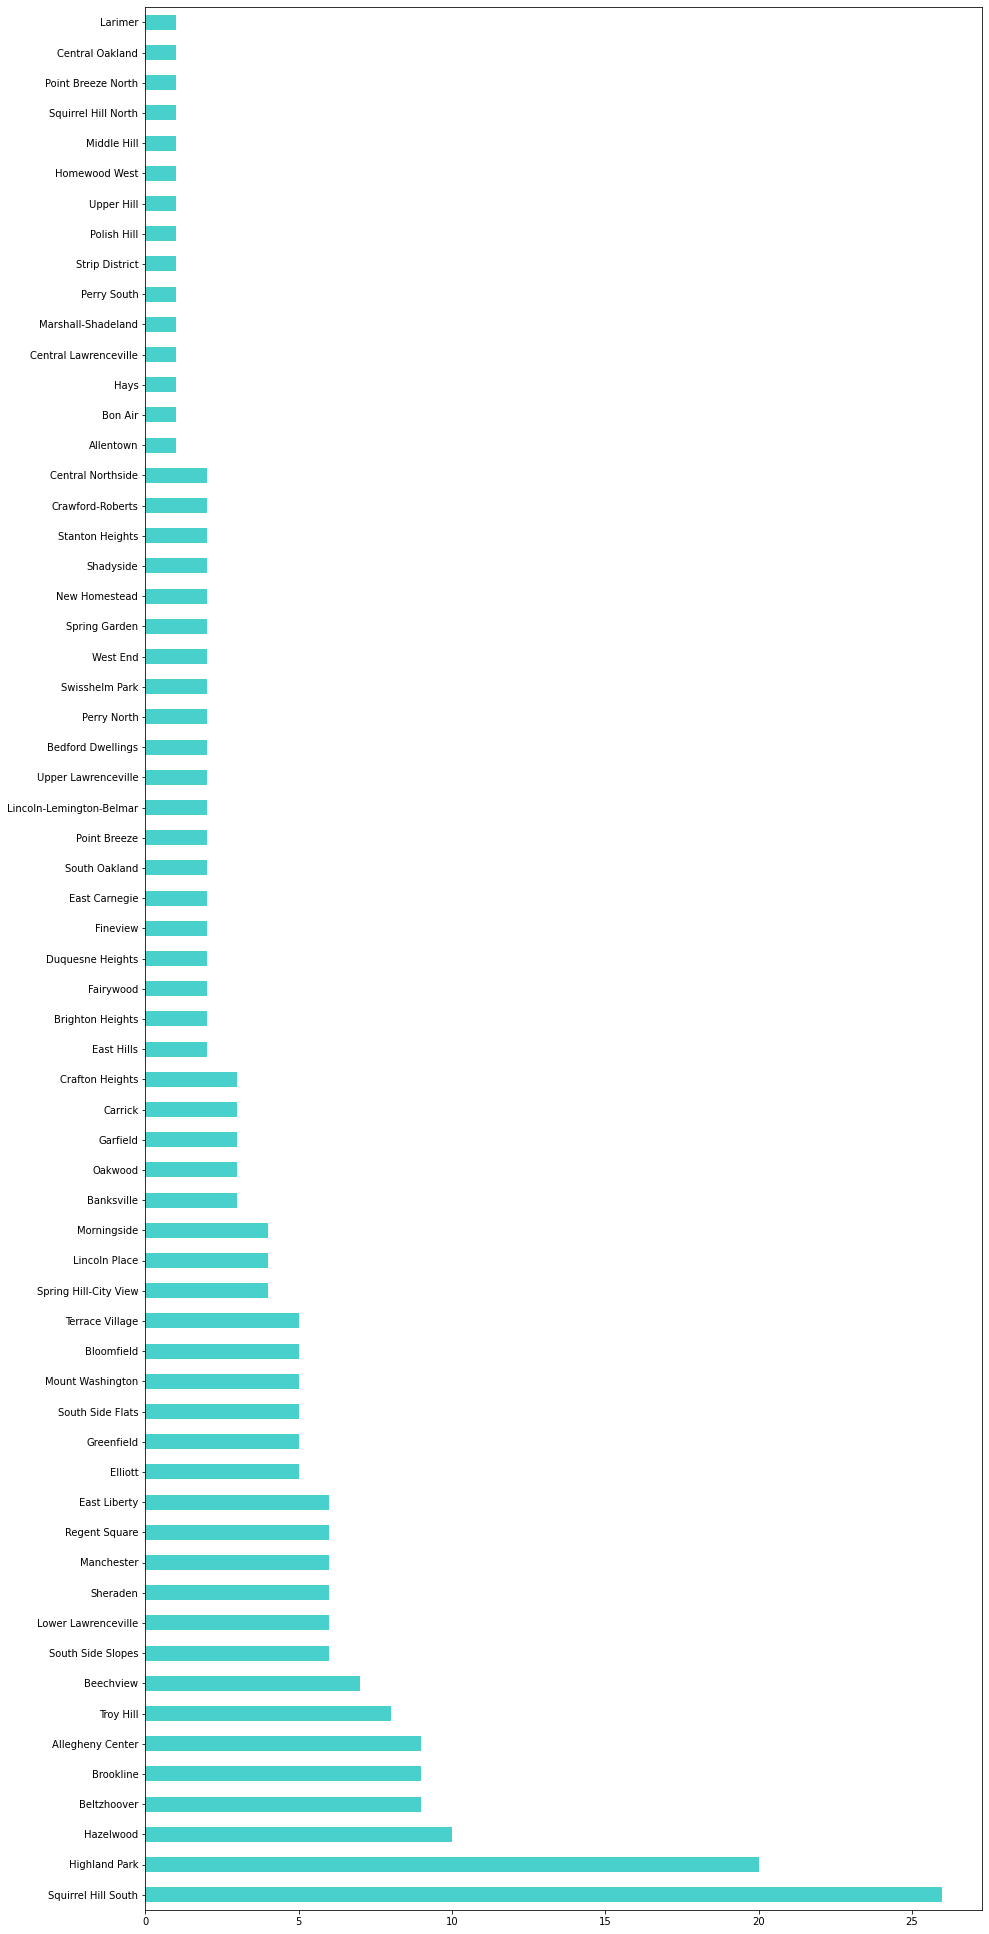

In [10]:
Parks.plot(kind='barh', rot=0, figsize=(15,35), color = 'mediumturquoise')

In [24]:
Parks.head(3)

Squirrel Hill South    26
Highland Park          20
Hazelwood              10
Name: neighborhood, dtype: int64

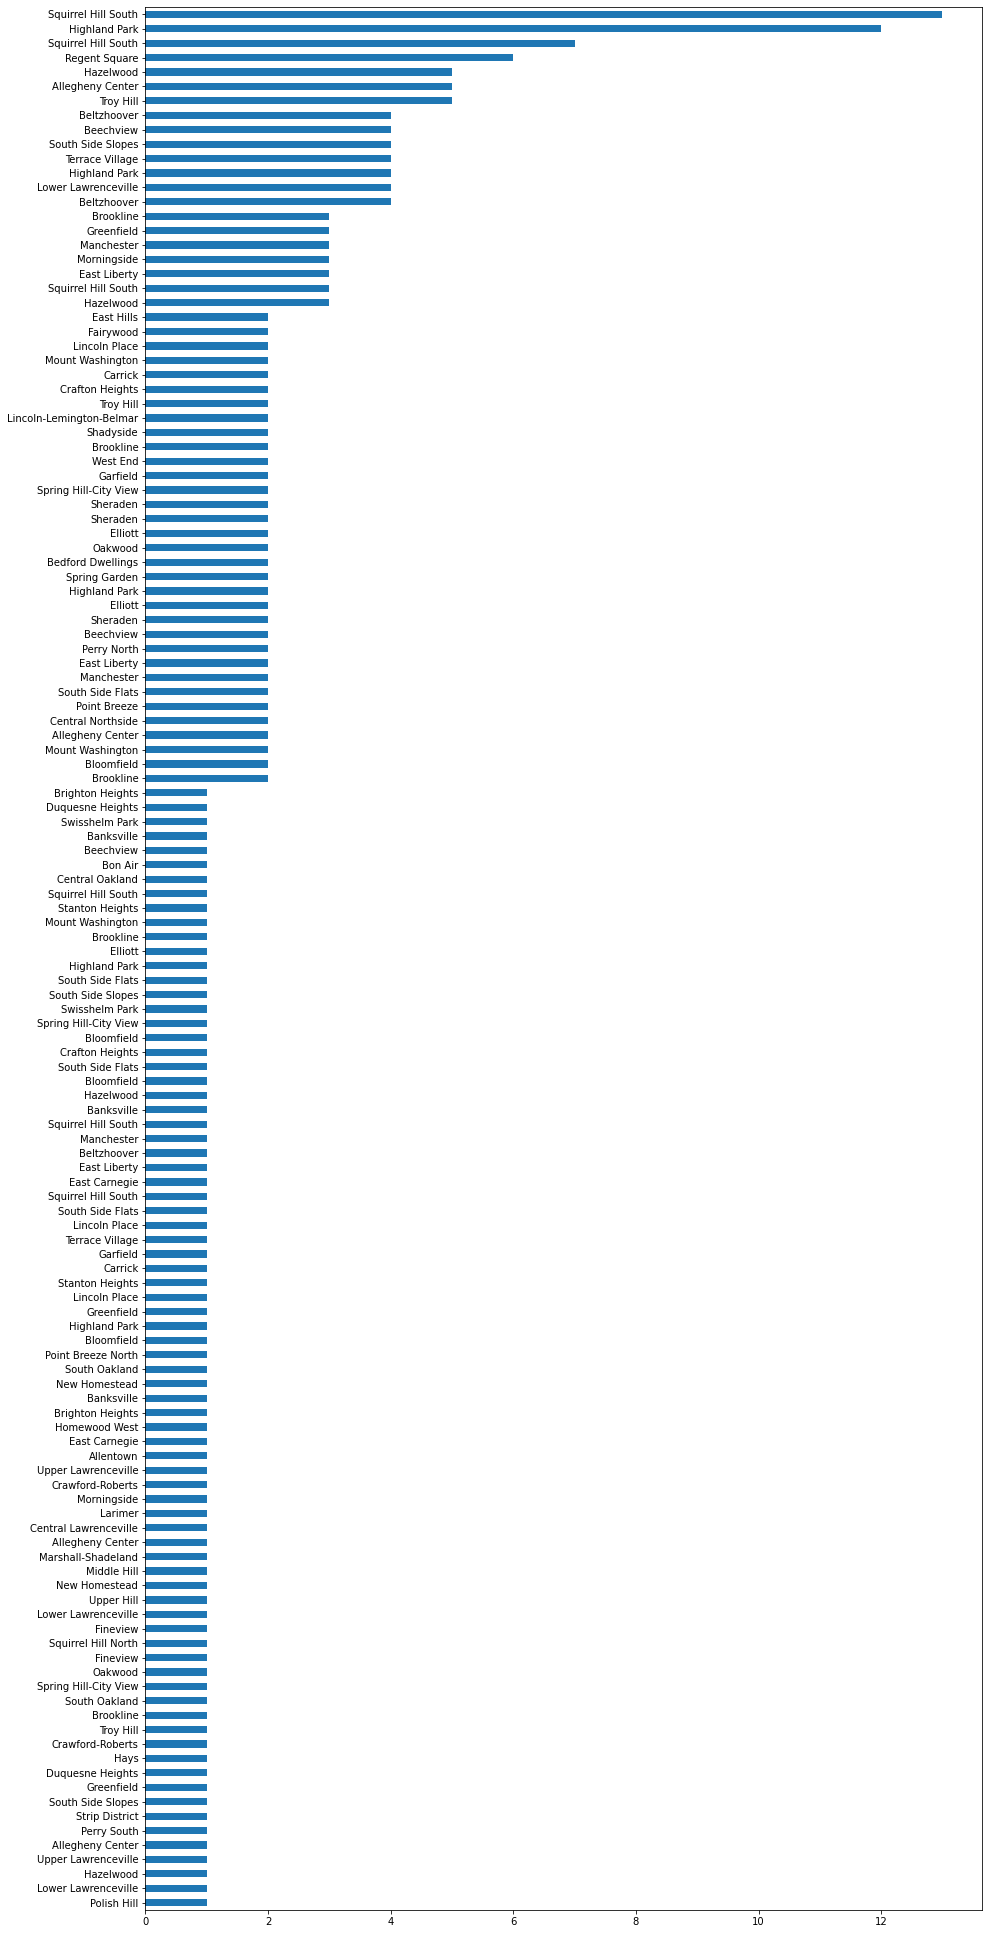

In [41]:
df = pd.merge(Parks, Playgrounds, right_index = True, left_index = True )
df['neighborhood'] = df['neighborhood_x'] + df['neighborhood_y']
total_parks = df['neighborhood']
print(total_parks)

Squirrel Hill South    34
Highland Park          24
Hazelwood              13
Beltzhoover            13
Brookline              11
                       ..
Middle Hill             2
Squirrel Hill North     2
Point Breeze North      2
Central Oakland         2
Larimer                 2
Name: neighborhood, Length: 61, dtype: int64


In [27]:
total_Parks.sort_values().tail(5)

Brookline               9
Beltzhoover             9
Hazelwood              10
Highland Park          20
Squirrel Hill South    26
Name: neighborhood, dtype: int64

## **Introduction**

As part of the best neighborhood for a kid to grow up in, one of the metrics we had to look at was enrollment in schools. We decided to look at enrollment in schools by neighborhood, as we decided a neighborhood with more children enrolled in schools would be "better." 

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
neighborhoodEnroll = pd.read_csv("neighborhood_enrollment.csv")


neighborhoodEnroll = neighborhoodEnroll.iloc[:, [0,8]]
neighborhoodEnroll = neighborhoodEnroll.dropna()
print(neighborhoodEnroll)

In [ ]:
kidsSchools = {} # Make Dictionary
df = pd.DataFrame(neighborhoodEnroll)
for index, row in df.iterrows():
    try:
        kidsSchools[row['neighborhood']] += int(row['total_students_enrolled'])
    except:
        kidsSchools[row['neighborhood']] = int(row['total_students_enrolled'])

print(kidsSchools)

data = pd.DataFrame(kidsSchools, index=[0])
ax = data.plot.barh(rot=0, figsize=(15,35))
ax.set_xlabel('Enrollment')
ax.set_ylabel('Neighborhoods')
ax.invert_yaxis()
plt.title('Number of Kids Enrolled in School by Neighborhood')

In [ ]:
topTen = data.max().nlargest(10)
topTen.plot.barh(rot=0, figsize=(5,10))
plt.title('Top Ten Neighborhoods by Kids Enrolled in School')
plt.xlabel('Enrollment')
plt.ylabel('Neighborhood')

In [ ]:
bottomTen = data.min().nsmallest(10)
bottomTen.plot.barh(rot=0, figsize=(5,10))
plt.title('Bottom Ten Neighborhoods by kids Enrolled in School')
plt.xlabel('Enrollment')
plt.ylabel('Neighborhood')

In [ ]:
import pandas as pd
import geopandas
%matplotlib inline

neighborhoods = geopandas.read_file('Neighborhoods_.shp')

In [ ]:
school_enroll = neighborhoodEnroll.groupby('neighborhood').sum()['total_students_enrolled']
school_enroll.sort_values(ascending=False)

schools_map = neighborhoods.merge(school_enroll, how='left', left_on='hood', right_on='neighborhood')
schools_map[['hood','total_students_enrolled']].head()

In [ ]:
schools_map.plot(column='total_students_enrolled', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Total Students Enrolled"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

In [ ]:
populations = pd.read_csv("population-density.csv")
populations = populations.iloc[:, [0,9]]
df = pd.DataFrame(populations)
print(df)

pop_data = df.set_index('Neighborhood').T.to_dict('records')[0]
for key in pop_data:
    pop_data[key] = pop_data[key].replace(',', '')

print(pop_data)

In [ ]:
school_percents = {}
for key in pop_data:
    if key in pop_data and key in kidsSchools:
        school_percents[key] = (kidsSchools[key] / int(pop_data[key])) * 100

print(school_percents)

In [ ]:
s = pd.DataFrame(school_percents, index=[0])
topTenPers = s.max().nlargest(10)
topTenPers.plot.barh(rot=0, figsize=(5,10))
plt.title('Top Ten Neighborhoods by Percentage of Kids Enrolled in School')
plt.xlabel('Percentage')
plt.ylabel('Neighborhood')

In [ ]:
school_series = pd.DataFrame(school_percents.items(), columns=['Neighborhood', 'Percent'])
school_percentages = school_series.groupby('Neighborhood').sum()['Percent']
s = school_percentages.sort_values(ascending=False)
print(s)

percentages_map = neighborhoods.merge(school_percentages, how='left', left_on='hood', right_on='Neighborhood')
percentages_map[['hood','Percent']].head()

In [ ]:
percentages_map.plot(column='Percent', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Percent of People in Neighboorhood Enrolled in School"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )